In [1]:
import lifesim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Parameter accounting for the non-perfect nulling:

In [2]:
delta_ = np.insert(np.logspace(-10, -1, num=10, base=10), 0, 0, axis=0)
print(delta_)

[0.e+00 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02
 1.e-01]


Function for the analysis:

In [3]:
def analyzeS2(maintitle,       # title to be put on the graph 
            legtitle,        # title of the legend
            savename,        # name to save the plot
            filter_range,    # range for the legend
            filter_bool,     # selection parameter = 'stype', 
                             # 'stypeHZ', 'distance', 'temperature', 's_insolation', 'angular_sep'
            delta, scenario, # range of delta, scenario = 'baseline'/'optimistic'/'pessimistic'
            ncol_leg=1):     # number of colums of the legend, 1 by default
    data = {}

    for val in delta:
        # import the previously saved catalog
        bus_read = lifesim.Bus()
        bus_read.data.options.set_scenario(scenario)
        if scenario == 'baseline':
            bus_read.data.import_catalog(input_path=f'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/DataBaselineTM_delta={val}.hdf5')
        elif scenario == 'optimistic':
            bus_read.data.import_catalog(input_path=f'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/DataOptimisticTM_delta={val}.hdf5')
        elif scenario == 'pessimistic':
            bus_read.data.import_catalog(input_path=f'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/DataPessimisticTM_delta={val}.hdf5')
        else:
            print('ERROR: wrong scenario specified')
            return None
    
        # retrieve the DataFrame object we will use
        df = bus_read.data.catalog
    
        # define the selection parameter
        if filter_bool == 'stype':
            param = df.stype
            bool_range = [param == 1, param == 2, param == 3, param == 4]
        elif filter_bool == 'stypeHZ':
            param = df.stype
            bool_range = [(param == 1) & (df.habitable), (param == 2) & (df.habitable), 
                          (param == 3) & (df.habitable), (param == 4) & (df.habitable)]
        elif filter_bool == 'distance':
            param = df.distance_s
            bool_range = [param < 3, (param >= 3) & (param < 5), 
                          (param >= 5) & (param < 7), (param >= 7) & (param < 9), 
                          (param >= 9) & (param < 11), (param >= 11) & (param < 13), 
                          (param >= 13) & (param < 15), param >= 15]
        elif filter_bool == 'temperature':
            param = df.temp_p
            bool_range = [param < 125, (param >= 125) & (param < 150), (param >= 150) & (param < 175), 
                          (param >= 175) & (param < 200), (param >= 200) & (param < 225), 
                          (param >= 225) & (param < 250), (param >= 250) & (param < 275), 
                          (param >= 275) & (param < 300), param >= 300]
        elif filter_bool == 's_insolation':
            param = df.flux_p
            bool_range = [param < 0.2, (param >= 0.2) & (param < 0.4), (param >= 0.4) & (param < 0.6), 
                          (param >= 0.6) & (param < 0.8), (param >= 0.8) & (param < 1.0), 
                          (param >= 1.0) & (param < 1.2), (param >= 1.2) & (param < 1.4), 
                          (param >= 1.4) & (param < 1.6), param >= 1.6]
        elif filter_bool == 'angular_sep':
            param = df.angsep
            bool_range = [param < 0.1, (param >= 0.1) & (param < 0.2), 
                              (param >= 0.2) & (param < 0.3), param >= 0.3]
        else:
            print("ERROR: wrong selection parameter")
            return None
    
        # select the detectable planets according to the selection parameter
        nb_detected = []
        for filter_ in bool_range:
            selection = filter_ & df.detected
            nb_detected.append(selection.sum()/500)
            data[f'{val}'] = nb_detected

    ObsYield = pd.DataFrame(data, index=filter_range) # will be returned by the function
    
    # plot the results
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 6))

    for filter_ in filter_range:
        ax1.plot(delta, ObsYield.loc[filter_])

    ax1.set_ylabel("Number of detectable planets")
    ax1.set_xlabel(r"$\delta$")
    ax1.legend(filter_range, loc='best', ncol=ncol_leg, title=legtitle)
    ax1.set_xscale('log')

    for filter_ in filter_range:
        ax2.plot(delta, ((ObsYield.loc[filter_] - ObsYield.loc[filter_][0])/(ObsYield.loc[filter_][0]))*100)

    ax2.set_ylabel(r"Relative change in the number of detected planets [%]")
    ax2.set_xlabel(r"$\delta$")
    ax2.legend(filter_range, loc='best', ncol=ncol_leg, title=legtitle)
    ax2.set_xscale('log')

    fig.suptitle(maintitle)
    plt.savefig('C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedFigures/' + savename, dpi=300)
    plt.show()

    return ObsYield


# Scenario 2: Maximizing the number of detected planets in the HZ ("rocky eHZ")

this scenario is True by default when defining the scenario of the simulation (baseline, optimistic and pessimistic). 
Change via command: "bus.data.options.set_manual(habitable=False)" to obtain scenario 1 (maximizing the total number of detected planets, see below).

## 'Baseline' configuration

### (B) Number of detectable planets for all types of stars

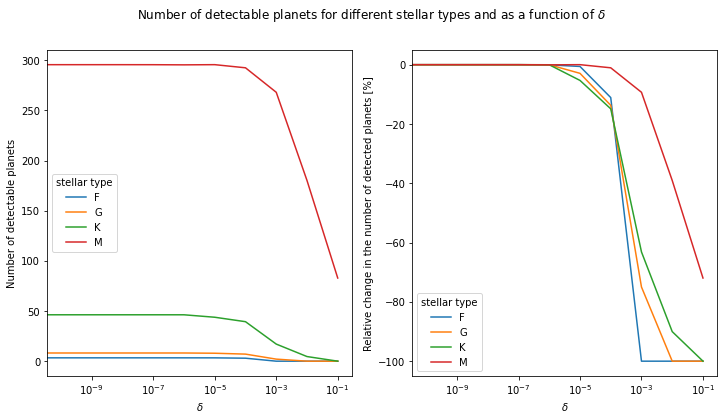

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,3.336,3.336,3.336,3.336,3.336,3.334,3.316,2.966,0.000,0.000,0.000
G,8.156,8.156,8.156,8.156,8.156,8.154,7.918,7.038,2.040,0.000,0.000
K,46.258,46.258,46.258,46.258,46.258,46.244,43.802,39.372,17.042,4.610,0.000
M,295.618,295.618,295.618,295.616,295.596,295.452,295.634,292.508,268.094,180.192,82.906


In [4]:
analyzeS2(r"Number of detectable planets for different stellar types and as a function of $\delta$",
        'stellar type', 'S2_Baseline_Stype.png',
        ["F", "G", "K", "M"], 'stype',
        delta_, 'baseline') 

### (B) Number of detectable planets in the HZ for different types of host stars

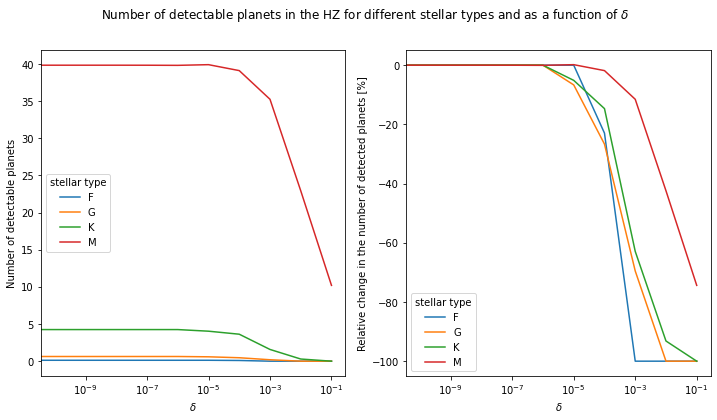

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.122,0.122,0.122,0.122,0.122,0.122,0.122,0.094,0.000,0.00,0.000
G,0.630,0.630,0.630,0.630,0.630,0.630,0.588,0.462,0.192,0.00,0.000
K,4.254,4.254,4.254,4.254,4.254,4.254,4.036,3.630,1.578,0.29,0.000
M,39.842,39.842,39.842,39.842,39.838,39.822,39.914,39.114,35.254,22.94,10.204


In [5]:
analyzeS2("Number of detectable planets in the HZ for different stellar types and as a function of $\delta$",
        'stellar type', 'S2_Baseline_StypeHZ.png',
        ["F", "G", "K", "M"], 'stypeHZ',
        delta_, 'baseline')

### (B) Number of detectable planets as a function of their distance to the instrument

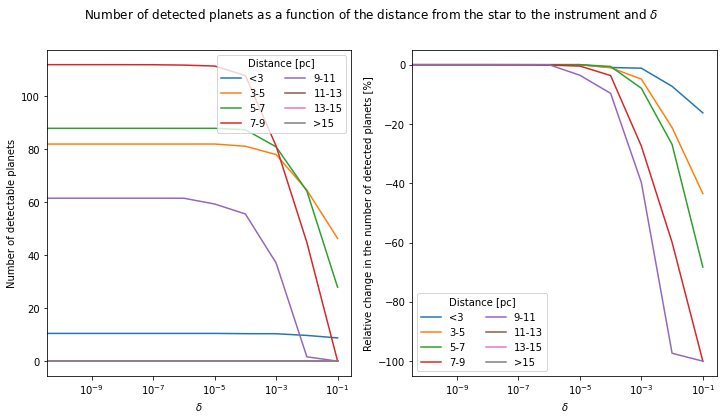

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<3,10.470,10.470,10.470,10.470,10.470,10.470,10.470,10.370,10.346,9.706,8.768
3-5,81.868,81.868,81.868,81.868,81.868,81.868,81.874,81.040,77.888,64.500,46.272
5-7,87.794,87.794,87.794,87.794,87.794,87.788,87.796,87.272,80.816,64.170,27.866
7-9,111.792,111.792,111.792,111.790,111.770,111.628,111.272,107.698,81.096,44.786,0.000
9-11,61.444,61.444,61.444,61.444,61.444,61.430,59.258,55.504,37.030,1.640,0.000
11-13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
13-15,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
>15,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [6]:
# ??: does it make sense at the moment? all M-type stars > 10 pc removed to speed up calculations
analyzeS2("Number of detected planets as a function of the distance from the star to the instrument and $\delta$",
        'Distance [pc]', 'S2_Baseline_Distance.png',
        ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"], 'distance',
        delta_, 'baseline', 2)

### (B) Number of detectable planets as a function of their temperature

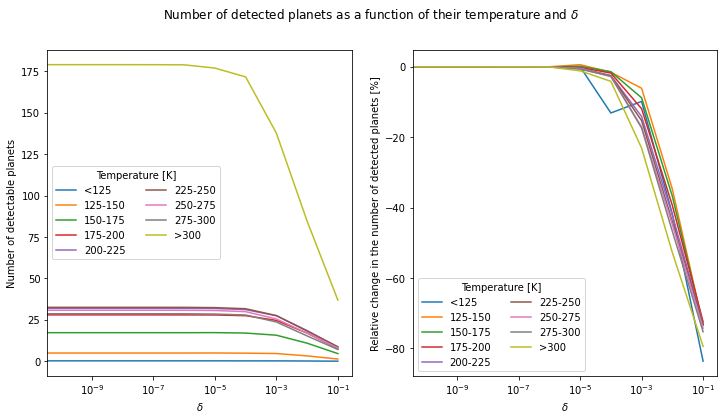

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<125,0.244,0.244,0.244,0.244,0.244,0.244,0.244,0.212,0.220,0.142,0.040
125-150,4.952,4.952,4.952,4.952,4.952,4.952,4.982,4.876,4.650,3.232,1.316
150-175,17.242,17.242,17.242,17.242,17.242,17.232,17.268,17.002,15.724,10.904,4.602
175-200,27.984,27.984,27.984,27.984,27.984,27.958,27.926,27.490,24.654,16.968,7.724
200-225,31.954,31.954,31.954,31.954,31.950,31.934,31.824,31.158,27.444,18.492,8.586
225-250,32.534,32.534,32.534,32.534,32.532,32.518,32.362,31.702,27.562,18.220,8.716
250-275,30.784,30.784,30.784,30.784,30.782,30.774,30.630,29.928,25.528,16.984,7.930
275-300,28.674,28.674,28.674,28.674,28.670,28.666,28.486,27.910,23.692,15.274,7.098
>300,179.000,179.000,179.000,178.998,178.990,178.906,176.948,171.606,137.702,84.586,36.894


In [7]:
analyzeS2("Number of detected planets as a function of their temperature and $\delta$",
        'Temperature [K]', 'S2_Baseline_Temperature.png',
        ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"], 'temperature',
        delta_, 'baseline', 2)

### (B) Number of detectable planets as a function of their stellar insolation

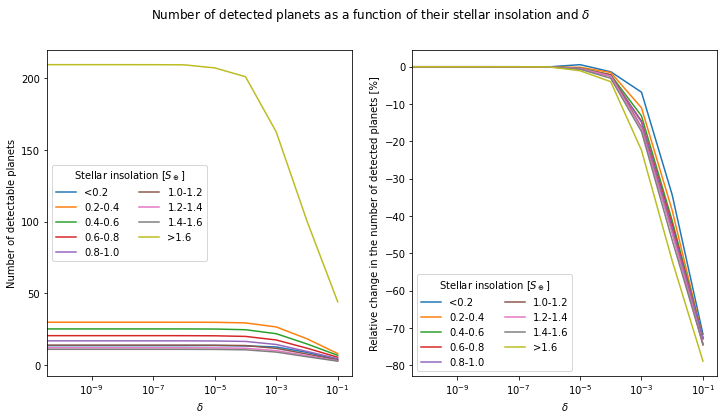

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.2,13.676,13.676,13.676,13.676,13.676,13.672,13.752,13.492,12.744,8.976,3.872
0.2-0.4,29.982,29.982,29.982,29.982,29.982,29.954,29.938,29.516,26.684,18.432,8.144
0.4-0.6,25.320,25.320,25.320,25.320,25.320,25.312,25.230,24.762,21.984,14.860,6.916
0.6-0.8,20.626,20.626,20.626,20.626,20.626,20.614,20.528,20.102,17.620,11.894,5.590
0.8-1.0,17.014,17.014,17.014,17.014,17.010,17.006,16.922,16.602,14.480,9.662,4.638
1.0-1.2,14.032,14.032,14.032,14.032,14.030,14.028,13.954,13.734,11.756,7.824,3.570
1.2-1.4,12.184,12.184,12.184,12.184,12.184,12.178,12.126,11.882,10.170,6.744,3.146
1.4-1.6,11.116,11.116,11.116,11.116,11.116,11.116,11.044,10.772,9.186,5.948,2.848
>1.6,209.418,209.418,209.418,209.416,209.402,209.304,207.176,201.022,162.552,100.462,44.182


In [8]:
analyzeS2("Number of detected planets as a function of their stellar insolation and $\delta$",
        'Stellar insolation [$S_\oplus$]', 'S2_Baseline_SInsolation.png',
        ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"], 's_insolation',
        delta_, 'baseline', 2)

### (B) Number of detectable planets a function of their angular separation to their host star

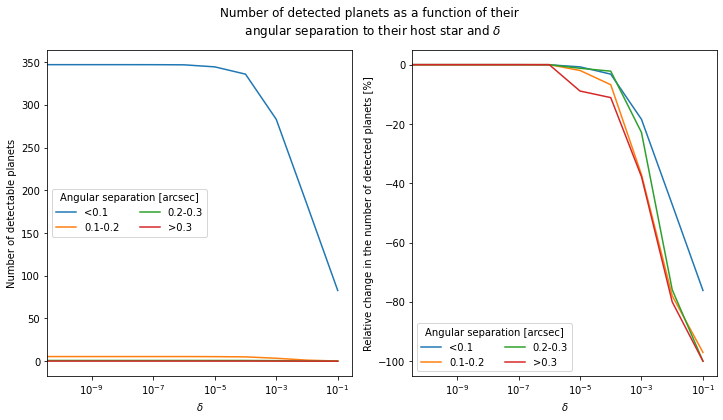

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.1,347.042,347.042,347.042,347.040,347.020,346.858,344.468,335.952,283.080,183.392,82.746
0.1-0.2,5.414,5.414,5.414,5.414,5.414,5.414,5.308,5.048,3.406,1.194,0.160
0.2-0.3,0.822,0.822,0.822,0.822,0.822,0.822,0.812,0.804,0.634,0.198,0.000
>0.3,0.090,0.090,0.090,0.090,0.090,0.090,0.082,0.080,0.056,0.018,0.000


In [9]:
analyzeS2("Number of detected planets as a function of their \n angular separation to their host star and $\delta$",
        'Angular separation [arcsec]', 'S2_Baseline_AngSep.png',
        ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"], 'angular_sep',
        delta_, 'baseline', 2)

## 'Optimistic' configuration

### (O) Number of detectable planets for all types of stars

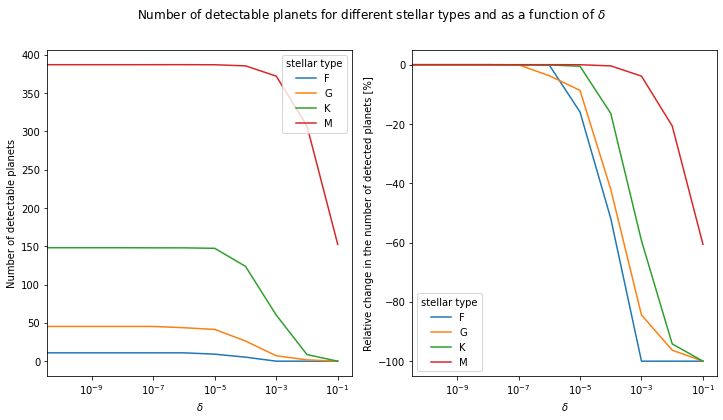

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,10.892,10.892,10.892,10.892,10.890,10.880,9.156,5.246,0.000,0.000,0.00
G,45.352,45.352,45.352,45.352,45.342,43.670,41.426,26.304,7.070,1.682,0.00
K,148.110,148.110,148.110,148.110,147.986,147.968,147.344,123.808,60.178,8.610,0.00
M,387.118,387.118,387.118,387.118,387.142,387.162,387.046,385.606,372.216,307.130,152.51


In [10]:
analyzeS2(r"Number of detectable planets for different stellar types and as a function of $\delta$",
        'stellar type', 'S2_Optimistic_Stype.png',
        ["F", "G", "K", "M"], 'stype',
        delta_, 'optimistic') 

### (O) Number of detectable planets in the HZ for different types of host stars

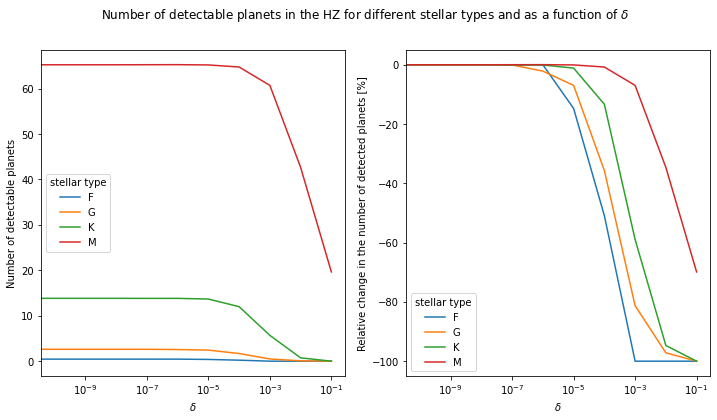

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.448,0.448,0.448,0.448,0.448,0.448,0.382,0.220,0.000,0.000,0.000
G,2.618,2.618,2.618,2.618,2.616,2.562,2.436,1.684,0.490,0.074,0.000
K,13.834,13.834,13.834,13.834,13.822,13.824,13.678,11.992,5.680,0.732,0.000
M,65.240,65.240,65.240,65.240,65.252,65.264,65.204,64.746,60.704,42.664,19.642


In [11]:
analyzeS2("Number of detectable planets in the HZ for different stellar types and as a function of $\delta$",
        'stellar type', 'S2_Optimistic_StypeHZ.png',
        ["F", "G", "K", "M"], 'stypeHZ',
        delta_, 'optimistic')

### (O) Number of detectable planets as a function of their distance to the instrument

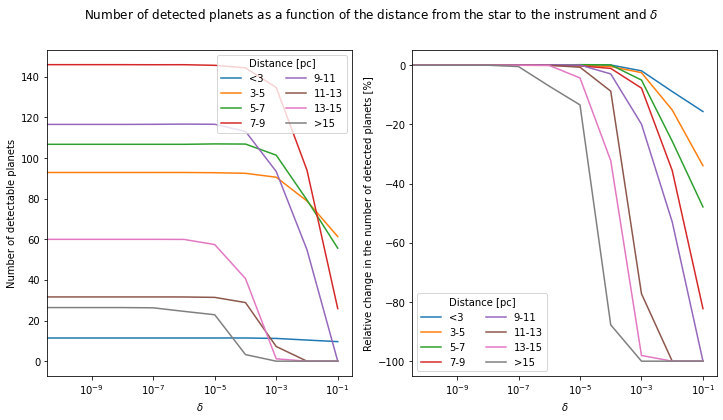

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<3,11.408,11.408,11.408,11.408,11.408,11.408,11.408,11.416,11.192,10.394,9.622
3-5,92.870,92.870,92.870,92.870,92.870,92.872,92.762,92.466,90.538,78.830,61.342
5-7,106.740,106.740,106.740,106.740,106.740,106.738,106.940,106.866,101.386,79.344,55.642
7-9,145.944,145.944,145.944,145.944,145.908,145.926,145.622,144.376,134.656,94.016,25.904
9-11,116.540,116.540,116.540,116.540,116.586,116.686,116.604,113.116,93.336,54.838,0.000
11-13,31.616,31.616,31.616,31.616,31.616,31.604,31.402,28.846,7.204,0.000,0.000
13-15,59.970,59.970,59.970,59.970,59.968,59.930,57.388,40.640,1.152,0.000,0.000
>15,26.384,26.384,26.384,26.384,26.264,24.516,22.846,3.238,0.000,0.000,0.000


In [12]:
# ??: does it make sense at the moment? all M-type stars > 10 pc removed to speed up calculations
analyzeS2("Number of detected planets as a function of the distance from the star to the instrument and $\delta$",
        'Distance [pc]', 'S2_Optimistic_Distance.png',
        ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"], 'distance',
        delta_, 'optimistic', 2)

### (O) Number of detectable planets as a function of their temperature

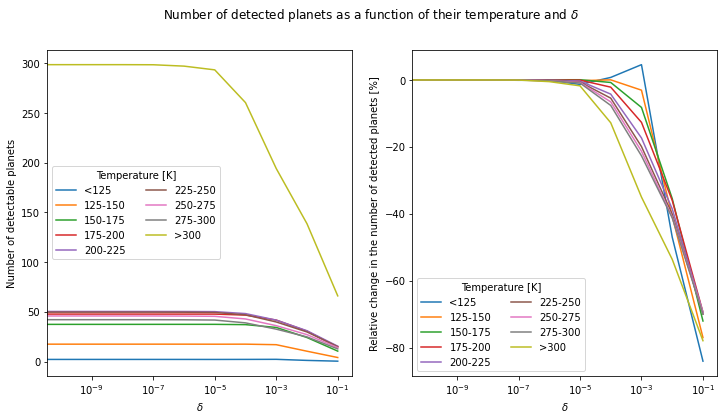

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<125,2.100,2.100,2.100,2.100,2.098,2.098,2.072,2.116,2.196,1.114,0.336
125-150,17.458,17.458,17.458,17.458,17.462,17.466,17.424,17.464,16.926,10.360,4.022
150-175,37.384,37.384,37.384,37.384,37.400,37.408,37.410,37.106,34.318,24.138,10.466
175-200,47.740,47.740,47.740,47.740,47.732,47.720,47.722,46.714,41.694,30.570,14.614
200-225,50.372,50.372,50.372,50.372,50.364,50.338,50.208,48.244,41.646,30.974,15.420
225-250,49.684,49.684,49.684,49.684,49.676,49.610,49.370,46.986,39.798,29.750,14.926
250-275,45.834,45.834,45.834,45.834,45.824,45.724,45.486,42.838,36.074,27.062,13.982
275-300,42.104,42.104,42.104,42.104,42.098,41.996,41.718,38.902,32.562,24.758,12.668
>300,298.796,298.796,298.796,298.796,298.706,297.320,293.562,260.594,194.250,138.696,66.076


In [13]:
analyzeS2("Number of detected planets as a function of their temperature and $\delta$",
        'Temperature [K]', 'S2_Optimistic_Temperature.png',
        ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"], 'temperature',
        delta_, 'optimistic', 2)

### (O) Number of detectable planets as a function of their stellar insolation

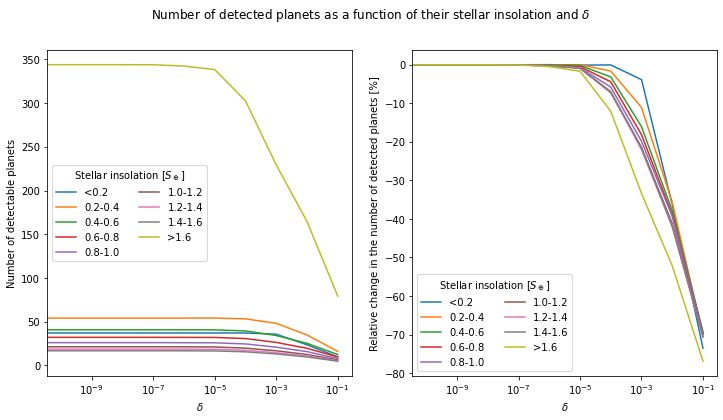

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.2,37.184,37.184,37.184,37.184,37.196,37.204,37.160,37.178,35.764,23.706,9.834
0.2-0.4,54.210,54.210,54.210,54.210,54.212,54.218,54.234,53.338,48.222,34.884,16.150
0.4-0.6,40.806,40.806,40.806,40.806,40.800,40.804,40.750,39.534,34.266,25.344,12.516
0.6-0.8,32.202,32.202,32.202,32.202,32.198,32.152,32.052,30.790,26.376,19.658,9.760
0.8-1.0,26.126,26.126,26.126,26.126,26.122,26.056,25.938,24.618,20.948,15.858,7.952
1.0-1.2,21.374,21.374,21.374,21.374,21.364,21.336,21.204,19.830,16.794,12.576,6.426
1.2-1.4,18.698,18.698,18.698,18.698,18.698,18.660,18.558,17.380,14.578,10.894,5.512
1.4-1.6,16.804,16.804,16.804,16.804,16.800,16.772,16.648,15.636,13.194,9.742,4.928
>1.6,344.068,344.068,344.068,344.068,343.970,342.478,338.428,302.660,229.322,164.760,79.432


In [14]:
analyzeS2("Number of detected planets as a function of their stellar insolation and $\delta$",
        'Stellar insolation [$S_\oplus$]', 'S2_Optimistic_SInsolation.png',
        ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"], 's_insolation',
        delta_, 'optimistic', 2)

### (O) Number of detectable planets a function of their angular separation to their host star

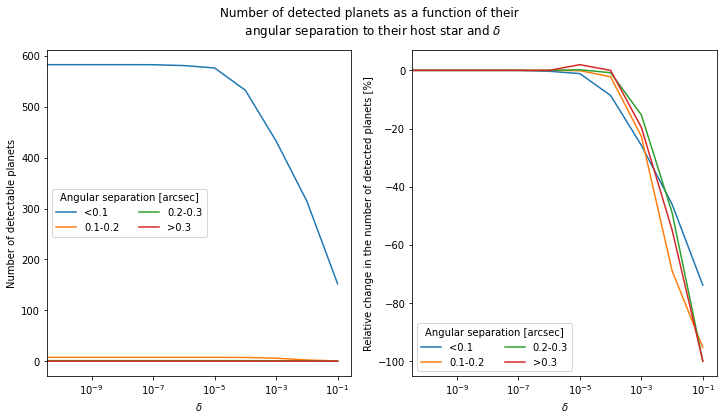

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.1,582.808,582.808,582.808,582.808,582.696,581.016,576.312,532.474,432.686,314.512,152.156
0.1-0.2,7.556,7.556,7.556,7.556,7.556,7.556,7.548,7.390,5.844,2.350,0.354
0.2-0.3,1.006,1.006,1.006,1.006,1.006,1.006,1.008,0.998,0.852,0.514,0.000
>0.3,0.102,0.102,0.102,0.102,0.102,0.102,0.104,0.102,0.082,0.046,0.000


In [15]:
analyzeS2("Number of detected planets as a function of their \n angular separation to their host star and $\delta$",
        'Angular separation [arcsec]', 'S2_Optimistic_AngSep.png',
        ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"], 'angular_sep',
        delta_, 'optimistic', 2)

## 'Pessimistic' configuration

### (P) Number of detectable planets for all types of stars

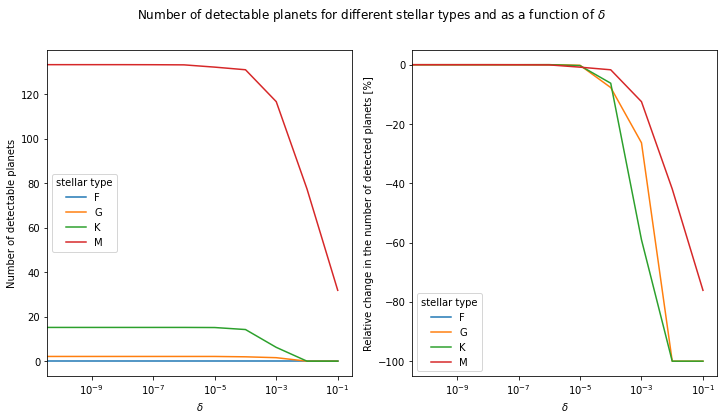

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
G,2.126,2.126,2.126,2.126,2.126,2.126,2.122,1.962,1.566,0.000,0.000
K,15.168,15.168,15.168,15.168,15.168,15.170,15.120,14.220,6.212,0.000,0.000
M,133.270,133.270,133.270,133.270,133.246,133.182,132.164,130.982,116.650,77.426,31.852


In [16]:
analyzeS2(r"Number of detectable planets for different stellar types and as a function of $\delta$",
        'stellar type', 'S2_Pessimistic_Stype.png',
        ["F", "G", "K", "M"], 'stype',
        delta_, 'pessimistic') 

### (P) Number of detectable planets in the HZ for different types of host stars

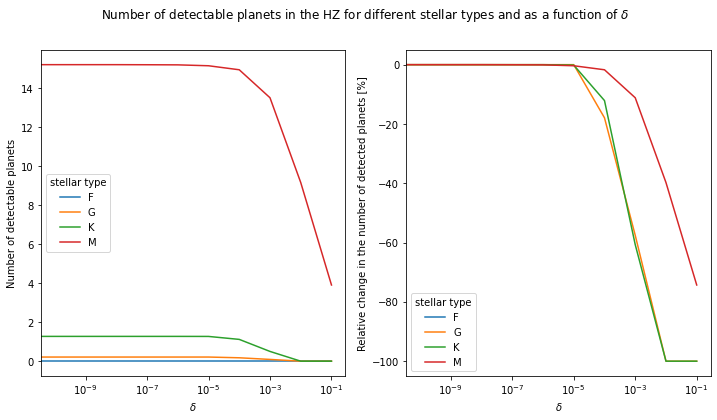

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00
G,0.212,0.212,0.212,0.212,0.212,0.212,0.212,0.174,0.09,0.000,0.00
K,1.272,1.272,1.272,1.272,1.272,1.272,1.270,1.118,0.50,0.000,0.00
M,15.218,15.218,15.218,15.218,15.214,15.208,15.162,14.956,13.52,9.168,3.91


In [17]:
analyzeS2("Number of detectable planets in the HZ for different stellar types and as a function of $\delta$",
        'stellar type', 'S2_Pessimistic_StypeHZ.png',
        ["F", "G", "K", "M"], 'stypeHZ',
        delta_, 'pessimistic')

### (P) Number of detectable planets as a function of their distance to the instrument

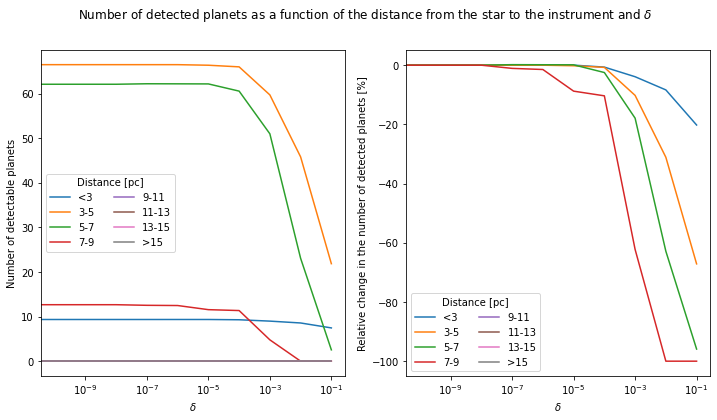

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<3,9.344,9.344,9.344,9.344,9.344,9.346,9.346,9.284,8.980,8.564,7.456
3-5,66.476,66.476,66.476,66.476,66.476,66.476,66.350,65.984,59.696,45.800,21.856
5-7,62.084,62.084,62.084,62.084,62.196,62.180,62.160,60.546,50.972,23.062,2.540
7-9,12.660,12.660,12.660,12.660,12.524,12.476,11.550,11.350,4.780,0.000,0.000
9-11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11-13,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
13-15,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
>15,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [18]:
# ??: does it make sense at the moment? all M-type stars > 10 pc removed to speed up calculations
analyzeS2("Number of detected planets as a function of the distance from the star to the instrument and $\delta$",
        'Distance [pc]', 'S2_Pessimistic_Distance.png',
        ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"], 'distance',
        delta_, 'pessimistic', 2)

### (P) Number of detectable planets as a function of their temperature

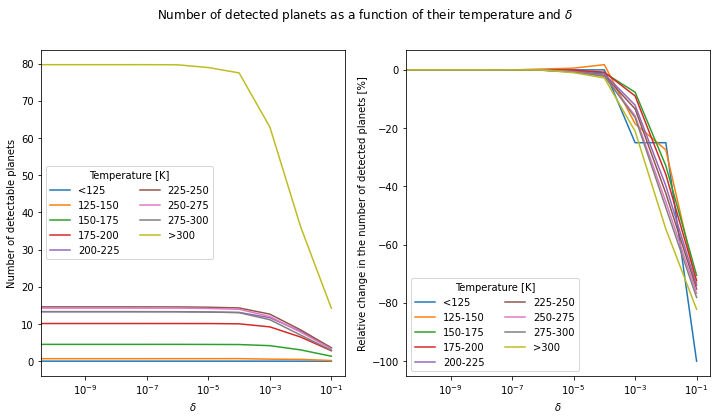

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<125,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.006,0.006,0.000
125-150,0.670,0.670,0.670,0.670,0.670,0.672,0.674,0.682,0.546,0.486,0.178
150-175,4.520,4.520,4.520,4.520,4.520,4.522,4.502,4.474,4.174,3.032,1.334
175-200,10.128,10.128,10.128,10.128,10.126,10.122,10.118,10.048,9.222,6.490,2.804
200-225,13.300,13.300,13.300,13.300,13.292,13.284,13.224,13.110,11.690,8.006,3.458
225-250,14.602,14.602,14.602,14.602,14.598,14.592,14.510,14.316,12.650,8.412,3.616
250-275,14.264,14.264,14.264,14.264,14.264,14.260,14.174,13.958,12.022,7.806,3.322
275-300,13.330,13.330,13.330,13.330,13.318,13.312,13.224,13.046,11.150,7.026,2.916
>300,79.742,79.742,79.742,79.742,79.744,79.706,78.972,77.522,62.968,36.162,14.224


In [19]:
analyzeS2("Number of detected planets as a function of their temperature and $\delta$",
        'Temperature [K]', 'S2_Pessimistic_Temperature.png',
        ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"], 'temperature',
        delta_, 'pessimistic', 2)

### (P) Number of detectable planets as a function of their stellar insolation

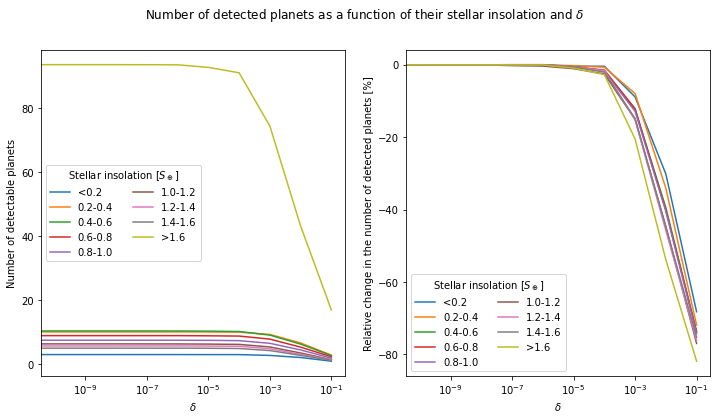

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.2,3.024,3.024,3.024,3.024,3.022,3.024,3.012,3.012,2.756,2.112,0.962
0.2-0.4,10.098,10.098,10.098,10.098,10.096,10.096,10.076,10.032,9.296,6.658,2.840
0.4-0.6,10.388,10.388,10.388,10.388,10.388,10.380,10.330,10.218,9.106,6.290,2.728
0.6-0.8,8.930,8.930,8.930,8.930,8.934,8.934,8.880,8.800,7.846,5.344,2.348
0.8-1.0,7.506,7.506,7.506,7.506,7.504,7.500,7.468,7.372,6.542,4.468,1.932
1.0-1.2,6.360,6.360,6.360,6.360,6.346,6.338,6.292,6.200,5.402,3.520,1.466
1.2-1.4,5.716,5.716,5.716,5.716,5.716,5.716,5.684,5.624,4.848,3.100,1.364
1.4-1.6,5.020,5.020,5.020,5.020,5.020,5.018,4.992,4.918,4.274,2.772,1.242
>1.6,93.522,93.522,93.522,93.522,93.514,93.472,92.672,90.988,74.358,43.162,16.970


In [20]:
analyzeS2("Number of detected planets as a function of their stellar insolation and $\delta$",
        'Stellar insolation [$S_\oplus$]', 'S2_Pessimistic_SInsolation.png',
        ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"], 's_insolation',
        delta_, 'pessimistic', 2)

### (P) Number of detectable planets a function of their angular separation to their host star

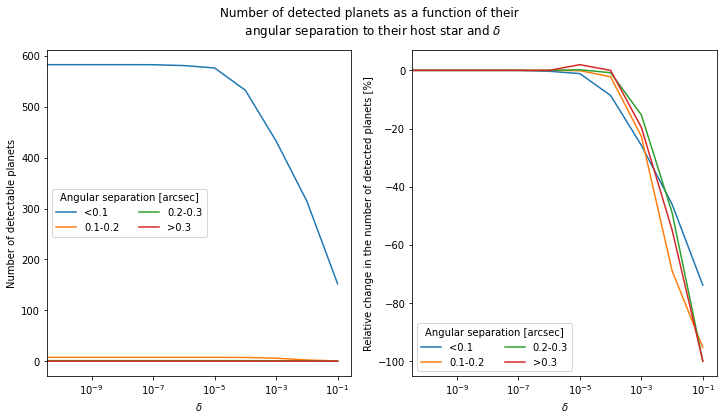

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.1,582.808,582.808,582.808,582.808,582.696,581.016,576.312,532.474,432.686,314.512,152.156
0.1-0.2,7.556,7.556,7.556,7.556,7.556,7.556,7.548,7.390,5.844,2.350,0.354
0.2-0.3,1.006,1.006,1.006,1.006,1.006,1.006,1.008,0.998,0.852,0.514,0.000
>0.3,0.102,0.102,0.102,0.102,0.102,0.102,0.104,0.102,0.082,0.046,0.000


In [21]:
analyzeS2("Number of detected planets as a function of their \n angular separation to their host star and $\delta$",
        'Angular separation [arcsec]', 'S2_Pessimistic_AngSep.png',
        ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"], 'angular_sep',
        delta_, 'optimistic', 2)

# Scenario 1: maximizing the total number of detected planets

Function for the analysis:

In [22]:
def analyzeS1(maintitle,       # title to be put on the graph 
            legtitle,        # title of the legend
            savename,        # name to save the plot
            filter_range,    # range for the legend
            filter_bool,     # selection parameter = 'stype', 
                             # 'stypeHZ', 'distance', 'temperature', 's_insolation', 'angular_sep'
            delta, scenario, # range of delta, scenario = 'baseline'/'optimistic'/'pessimistic'
            ncol_leg=1):     # number of colums of the legend, 1 by default
    data = {}

    for val in delta:
        # import the previously saved catalog
        bus_read = lifesim.Bus()
        bus_read.data.options.set_scenario(scenario)
        if scenario == 'baseline':
            bus_read.data.import_catalog(input_path=f'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/S1DataBaselineTM_delta={val}.hdf5')
        elif scenario == 'optimistic':
            bus_read.data.import_catalog(input_path=f'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/S1DataOptimisticTM_delta={val}.hdf5')
        elif scenario == 'pessimistic':
            bus_read.data.import_catalog(input_path=f'C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedData/S1DataPessimisticTM_delta={val}.hdf5')
        else:
            print('ERROR: wrong scenario specified')
            return None
    
        # retrieve the DataFrame object we will use
        df = bus_read.data.catalog
    
        # define the selection parameter
        if filter_bool == 'stype':
            param = df.stype
            bool_range = [param == 1, param == 2, param == 3, param == 4]
        elif filter_bool == 'stypeHZ':
            param = df.stype
            bool_range = [(param == 1) & (df.habitable), (param == 2) & (df.habitable), 
                          (param == 3) & (df.habitable), (param == 4) & (df.habitable)]
        elif filter_bool == 'distance':
            param = df.distance_s
            bool_range = [param < 3, (param >= 3) & (param < 5), 
                          (param >= 5) & (param < 7), (param >= 7) & (param < 9), 
                          (param >= 9) & (param < 11), (param >= 11) & (param < 13), 
                          (param >= 13) & (param < 15), param >= 15]
        elif filter_bool == 'temperature':
            param = df.temp_p
            bool_range = [param < 125, (param >= 125) & (param < 150), (param >= 150) & (param < 175), 
                          (param >= 175) & (param < 200), (param >= 200) & (param < 225), 
                          (param >= 225) & (param < 250), (param >= 250) & (param < 275), 
                          (param >= 275) & (param < 300), param >= 300]
        elif filter_bool == 's_insolation':
            param = df.flux_p
            bool_range = [param < 0.2, (param >= 0.2) & (param < 0.4), (param >= 0.4) & (param < 0.6), 
                          (param >= 0.6) & (param < 0.8), (param >= 0.8) & (param < 1.0), 
                          (param >= 1.0) & (param < 1.2), (param >= 1.2) & (param < 1.4), 
                          (param >= 1.4) & (param < 1.6), param >= 1.6]
        elif filter_bool == 'angular_sep':
            param = df.angsep
            bool_range = [param < 0.1, (param >= 0.1) & (param < 0.2), 
                              (param >= 0.2) & (param < 0.3), param >= 0.3]
        else:
            print("ERROR: wrong selection parameter")
            return None
    
        # select the detectable planets according to the selection parameter
        nb_detected = []
        for filter_ in bool_range:
            selection = filter_ & df.detected
            nb_detected.append(selection.sum()/500)
            data[f'{val}'] = nb_detected

    ObsYield = pd.DataFrame(data, index=filter_range) # will be returned by the function
    
    # plot the results
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12, 6))

    for filter_ in filter_range:
        ax1.plot(delta, ObsYield.loc[filter_])

    ax1.set_ylabel("Number of detectable planets")
    ax1.set_xlabel(r"$\delta$")
    ax1.legend(filter_range, loc='best', ncol=ncol_leg, title=legtitle)
    ax1.set_xscale('log')

    for filter_ in filter_range:
        ax2.plot(delta, ((ObsYield.loc[filter_] - ObsYield.loc[filter_][0])/(ObsYield.loc[filter_][0]))*100)

    ax2.set_ylabel(r"Relative change in the number of detected planets [%]")
    ax2.set_xlabel(r"$\delta$")
    ax2.legend(filter_range, loc='best', ncol=ncol_leg, title=legtitle)
    ax2.set_xscale('log')

    fig.suptitle(maintitle)
    plt.savefig('C:/Users/kervy/Desktop/LIFEmission/LIFEsim/SavedFigures/' + savename, dpi=300)
    plt.show()

    return ObsYield


## 'Baseline' configuration

### (B) Number of detectable planets for all types of stars

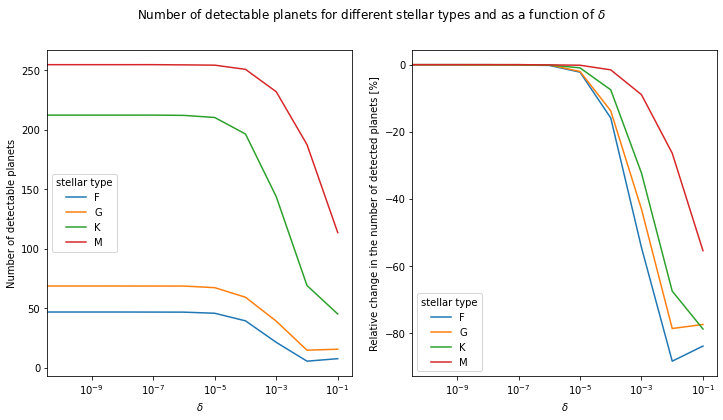

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,46.744,46.744,46.744,46.744,46.694,46.638,45.702,39.328,21.272,5.450,7.554
G,68.580,68.580,68.580,68.574,68.558,68.546,67.190,59.160,39.056,14.668,15.498
K,212.154,212.154,212.154,212.154,212.164,211.926,210.144,196.270,143.662,69.016,45.066
M,254.518,254.518,254.518,254.518,254.530,254.362,254.108,250.598,231.768,187.406,113.470


In [23]:
analyzeS1(r"Number of detectable planets for different stellar types and as a function of $\delta$",
        'stellar type', 'S1_Baseline_Stype.png',
        ["F", "G", "K", "M"], 'stype',
        delta_, 'baseline') 

### (B) Number of detectable planets in the HZ for different types of host stars

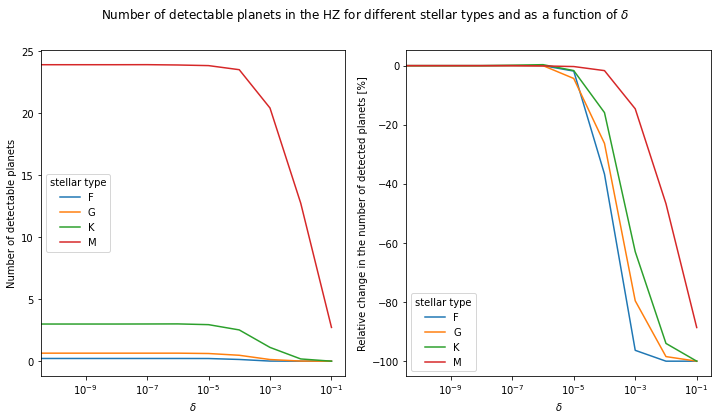

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.218,0.218,0.218,0.218,0.218,0.218,0.214,0.138,0.008,0.000,0.000
G,0.646,0.646,0.646,0.646,0.646,0.646,0.618,0.476,0.132,0.010,0.000
K,2.996,2.996,2.996,2.996,3.000,3.006,2.946,2.520,1.110,0.180,0.000
M,23.912,23.912,23.912,23.912,23.916,23.890,23.840,23.510,20.420,12.742,2.722


In [24]:
analyzeS1("Number of detectable planets in the HZ for different stellar types and as a function of $\delta$",
        'stellar type', 'S1_Baseline_StypeHZ.png',
        ["F", "G", "K", "M"], 'stypeHZ',
        delta_, 'baseline')

### (B) Number of detectable planets as a function of their distance to the instrument

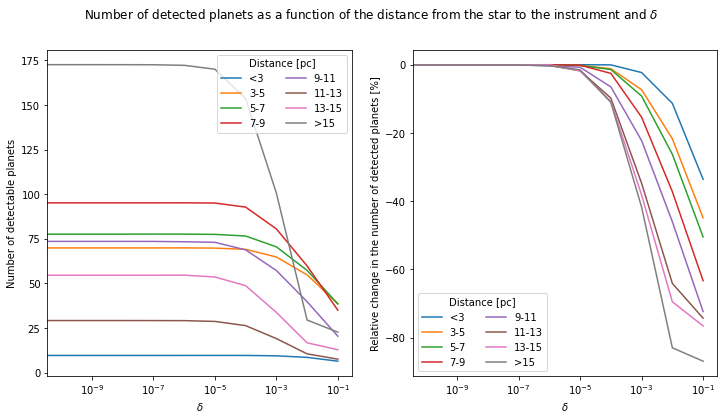

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<3,9.584,9.584,9.584,9.584,9.584,9.584,9.588,9.584,9.368,8.504,6.370
3-5,69.870,69.870,69.870,69.870,69.870,69.888,69.758,69.090,64.788,54.738,38.536
5-7,77.586,77.586,77.586,77.586,77.618,77.600,77.462,76.528,70.492,57.254,38.460
7-9,95.122,95.122,95.122,95.122,95.122,95.150,95.038,92.754,80.528,59.768,34.932
9-11,73.520,73.520,73.520,73.520,73.510,73.316,73.006,68.776,57.200,39.716,20.356
11-13,29.152,29.152,29.152,29.152,29.132,29.098,28.656,26.310,19.034,10.472,7.500
13-15,54.554,54.554,54.554,54.554,54.558,54.588,53.566,48.702,33.736,16.658,12.792
>15,172.608,172.608,172.608,172.602,172.552,172.248,170.070,153.612,100.612,29.430,22.642


In [25]:
# ??: does it make sense at the moment? all M-type stars > 10 pc removed to speed up calculations
analyzeS1("Number of detected planets as a function of the distance from the star to the instrument and $\delta$",
        'Distance [pc]', 'S1_Baseline_Distance.png',
        ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"], 'distance',
        delta_, 'baseline', 2)

### (B) Number of detectable planets as a function of their temperature

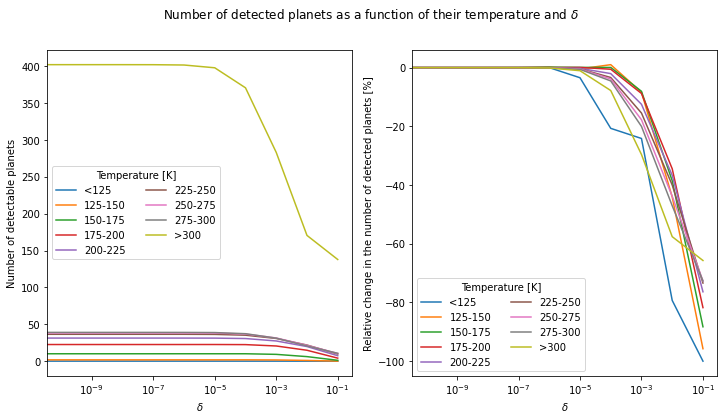

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<125,0.058,0.058,0.058,0.058,0.058,0.058,0.056,0.046,0.044,0.012,0.000
125-150,1.792,1.792,1.792,1.792,1.792,1.794,1.784,1.810,1.642,1.002,0.076
150-175,10.056,10.056,10.056,10.056,10.058,10.074,10.064,10.062,9.244,6.180,1.178
175-200,22.598,22.598,22.598,22.598,22.598,22.600,22.612,22.474,20.608,14.810,4.122
200-225,31.344,31.344,31.344,31.344,31.342,31.322,31.270,30.704,27.428,19.840,7.408
225-250,36.480,36.480,36.480,36.480,36.486,36.482,36.328,35.252,30.834,21.886,9.706
250-275,38.290,38.290,38.290,38.288,38.282,38.282,38.112,36.810,31.488,21.512,10.468
275-300,39.052,39.052,39.052,39.052,39.052,39.010,38.822,37.280,31.232,20.672,10.668
>300,402.326,402.326,402.326,402.322,402.278,401.850,398.096,370.918,283.238,170.626,137.962


In [27]:
analyzeS1("Number of detected planets as a function of their temperature and $\delta$",
        'Temperature [K]', 'S1_Baseline_Temperature.png',
        ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"], 'temperature',
        delta_, 'baseline', 2)

### (B) Number of detectable planets as a function of their stellar insolation

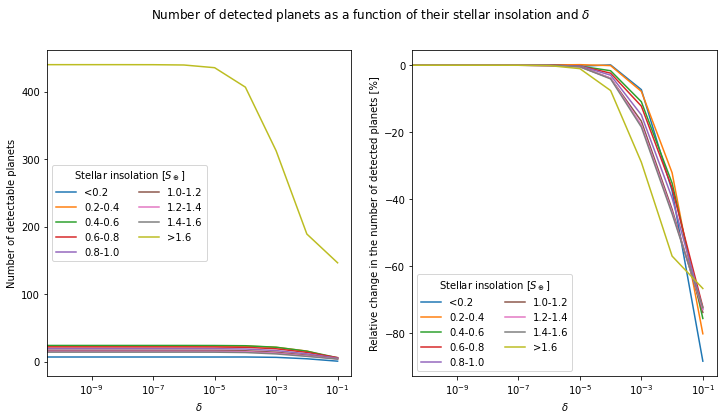

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.2,6.990,6.990,6.990,6.990,6.992,6.990,6.970,6.996,6.480,4.368,0.810
0.2-0.4,23.206,23.206,23.206,23.206,23.206,23.218,23.244,23.180,21.392,15.750,4.588
0.4-0.6,24.078,24.078,24.078,24.078,24.078,24.078,24.014,23.680,21.450,15.598,5.862
0.6-0.8,21.858,21.858,21.858,21.858,21.860,21.870,21.808,21.340,19.186,13.840,6.062
0.8-1.0,19.402,19.402,19.402,19.402,19.404,19.388,19.358,18.824,16.522,11.706,5.276
1.0-1.2,16.896,16.896,16.896,16.894,16.894,16.868,16.826,16.238,14.072,9.624,4.418
1.2-1.4,15.444,15.444,15.444,15.444,15.446,15.430,15.360,14.852,12.690,8.678,4.166
1.4-1.6,14.186,14.186,14.186,14.186,14.186,14.186,14.120,13.606,11.566,7.888,3.908
>1.6,439.936,439.936,439.936,439.932,439.880,439.444,435.444,406.640,312.400,189.088,146.498


In [28]:
analyzeS1("Number of detected planets as a function of their stellar insolation and $\delta$",
        'Stellar insolation [$S_\oplus$]', 'S1_Baseline_SInsolation.png',
        ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"], 's_insolation',
        delta_, 'baseline', 2)

### (B) Number of detectable planets a function of their angular separation to their host star

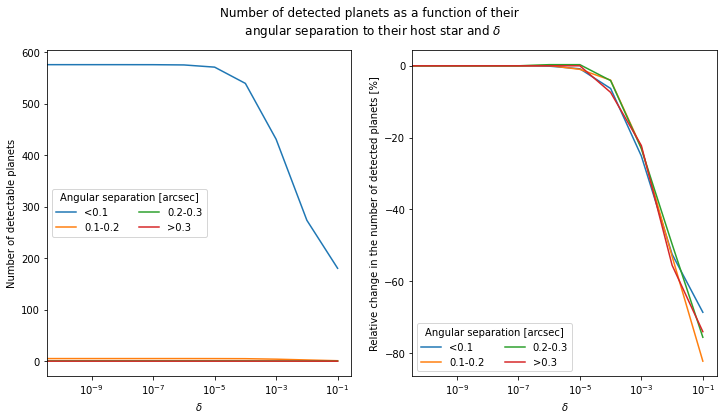

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.1,576.250,576.250,576.250,576.244,576.200,575.720,571.446,539.842,431.320,273.824,180.524
0.1-0.2,5.060,5.060,5.060,5.060,5.060,5.064,5.010,4.858,3.910,2.374,0.896
0.2-0.3,0.632,0.632,0.632,0.632,0.632,0.634,0.634,0.606,0.486,0.318,0.154
>0.3,0.054,0.054,0.054,0.054,0.054,0.054,0.054,0.050,0.042,0.024,0.014


In [29]:
analyzeS1("Number of detected planets as a function of their \n angular separation to their host star and $\delta$",
        'Angular separation [arcsec]', 'S1_Baseline_AngSep.png',
        ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"], 'angular_sep',
        delta_, 'baseline', 2)

## 'Optimistic' configuration

### (O) Number of detectable planets for all types of stars

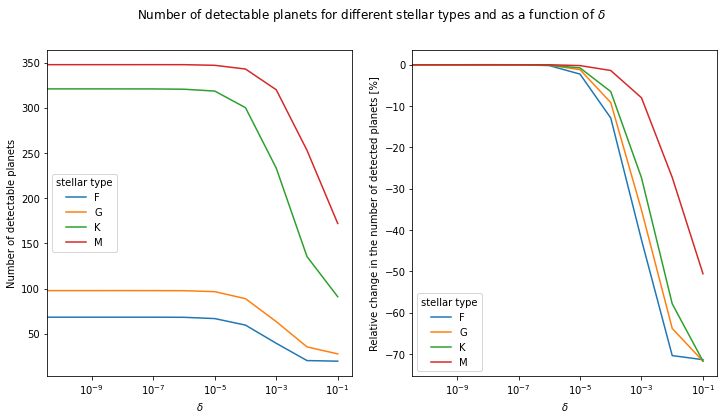

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,68.258,68.258,68.258,68.258,68.250,68.124,66.716,59.478,39.352,20.232,19.558
G,97.670,97.670,97.670,97.692,97.664,97.574,96.516,88.748,63.348,35.372,27.632
K,321.004,321.004,321.004,320.976,320.952,320.626,318.578,300.186,233.320,135.376,90.892
M,347.802,347.802,347.802,347.802,347.812,347.796,347.100,342.984,320.038,253.034,171.994


In [30]:
analyzeS1(r"Number of detectable planets for different stellar types and as a function of $\delta$",
        'stellar type', 'S1_Optimistic_Stype.png',
        ["F", "G", "K", "M"], 'stype',
        delta_, 'optimistic') 

### (O) Number of detectable planets in the HZ for different types of host stars

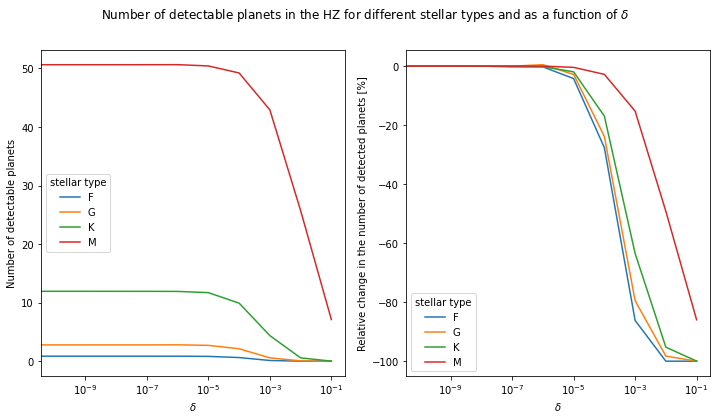

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.854,0.854,0.854,0.854,0.852,0.852,0.818,0.618,0.118,0.000,0.000
G,2.780,2.780,2.780,2.782,2.780,2.794,2.702,2.118,0.570,0.048,0.000
K,11.938,11.938,11.938,11.932,11.932,11.918,11.708,9.916,4.362,0.566,0.004
M,50.642,50.642,50.642,50.642,50.648,50.652,50.434,49.232,42.932,25.732,7.108


In [33]:
analyzeS1("Number of detectable planets in the HZ for different stellar types and as a function of $\delta$",
        'stellar type', 'S1_Optimistic_StypeHZ.png',
        ["F", "G", "K", "M"], 'stypeHZ',
        delta_, 'optimistic')

### (O) Number of detectable planets as a function of their distance to the instrument

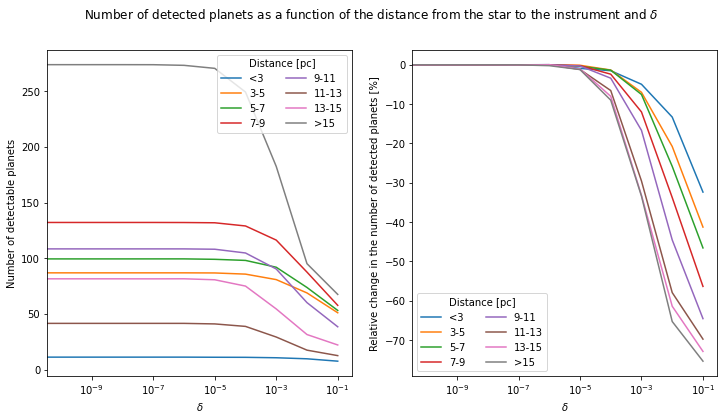

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<3,11.200,11.200,11.200,11.200,11.200,11.204,11.098,11.032,10.646,9.712,7.576
3-5,86.874,86.874,86.874,86.874,86.874,86.876,86.776,85.726,80.800,68.840,51.036
5-7,99.390,99.390,99.390,99.390,99.400,99.406,99.022,98.034,91.900,73.732,53.124
7-9,132.104,132.104,132.104,132.104,132.104,132.050,131.818,128.956,116.274,87.526,57.690
9-11,108.384,108.384,108.384,108.384,108.384,108.374,108.070,104.698,90.322,60.140,38.450
11-13,41.510,41.510,41.510,41.510,41.512,41.508,41.022,38.794,29.250,17.472,12.564
13-15,81.512,81.512,81.512,81.504,81.476,81.542,80.652,74.984,54.464,31.486,22.122
>15,273.760,273.760,273.760,273.762,273.728,273.160,270.452,249.172,182.402,95.106,67.514


In [34]:
# ??: does it make sense at the moment? all M-type stars > 10 pc removed to speed up calculations
analyzeS1("Number of detected planets as a function of the distance from the star to the instrument and $\delta$",
        'Distance [pc]', 'S1_Optimistic_Distance.png',
        ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"], 'distance',
        delta_, 'optimistic', 2)

### (O) Number of detectable planets as a function of their temperature

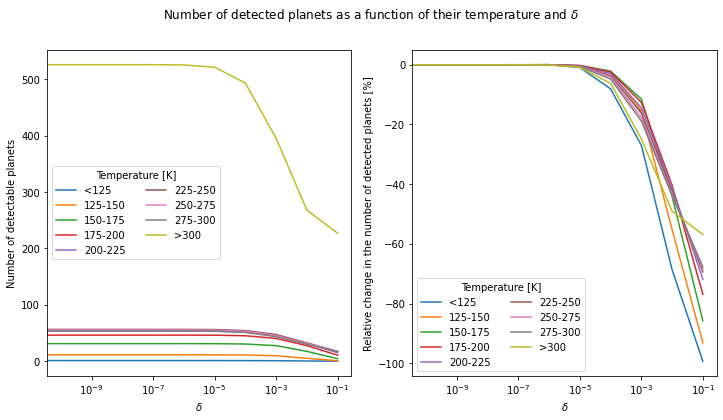

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<125,1.090,1.090,1.090,1.090,1.090,1.090,1.080,1.002,0.796,0.342,0.008
125-150,11.372,11.372,11.372,11.372,11.376,11.376,11.318,11.088,9.612,5.094,0.780
150-175,31.124,31.124,31.124,31.120,31.122,31.134,31.034,30.466,27.546,17.398,4.440
175-200,46.228,46.228,46.228,46.226,46.226,46.240,46.118,45.118,40.412,27.562,10.692
200-225,53.424,53.424,53.424,53.422,53.422,53.392,53.202,51.864,45.710,31.494,15.050
225-250,56.348,56.348,56.348,56.344,56.344,56.324,56.098,54.302,47.242,32.528,17.242
250-275,55.378,55.378,55.378,55.378,55.378,55.360,55.096,53.112,45.562,31.428,17.480
275-300,53.544,53.544,53.544,53.544,53.536,53.492,53.210,50.988,43.454,30.060,17.296
>300,526.226,526.226,526.226,526.232,526.184,525.712,521.754,493.456,395.724,268.108,227.088


In [35]:
analyzeS1("Number of detected planets as a function of their temperature and $\delta$",
        'Temperature [K]', 'S1_Optimistic_Temperature.png',
        ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"], 'temperature',
        delta_, 'optimistic', 2)

### (O) Number of detectable planets as a function of their stellar insolation

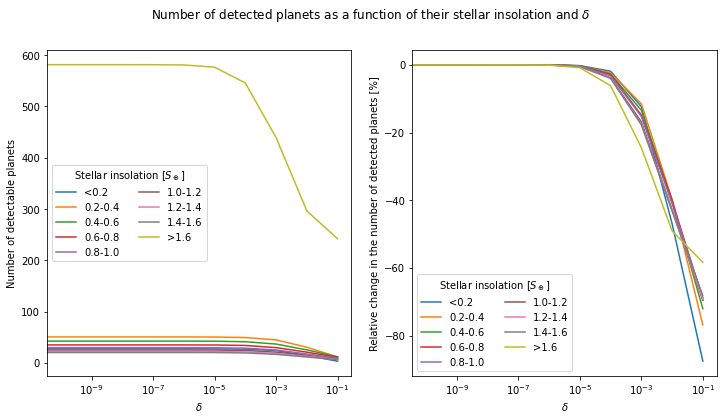

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.2,27.470,27.470,27.470,27.468,27.472,27.466,27.402,26.948,24.080,14.580,3.420
0.2-0.4,50.656,50.656,50.656,50.652,50.654,50.680,50.488,49.462,44.832,30.542,11.730
0.4-0.6,42.488,42.488,42.488,42.488,42.488,42.476,42.372,41.334,36.786,25.382,11.874
0.6-0.8,35.056,35.056,35.056,35.052,35.052,35.054,34.934,34.052,29.852,20.998,10.734
0.8-1.0,29.778,29.778,29.778,29.776,29.776,29.766,29.670,28.814,25.236,17.562,9.278
1.0-1.2,25.184,25.184,25.184,25.184,25.184,25.186,25.048,24.208,20.938,14.408,7.668
1.2-1.4,22.456,22.456,22.456,22.458,22.458,22.446,22.348,21.540,18.538,12.800,6.914
1.4-1.6,20.286,20.286,20.286,20.286,20.286,20.272,20.204,19.498,16.684,11.532,6.442
>1.6,581.360,581.360,581.360,581.364,581.308,580.774,576.444,545.540,439.112,296.210,242.016


In [36]:
analyzeS1("Number of detected planets as a function of their stellar insolation and $\delta$",
        'Stellar insolation [$S_\oplus$]', 'S1_Optimistic_SInsolation.png',
        ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"], 's_insolation',
        delta_, 'optimistic', 2)

### (O) Number of detectable planets a function of their angular separation to their host star

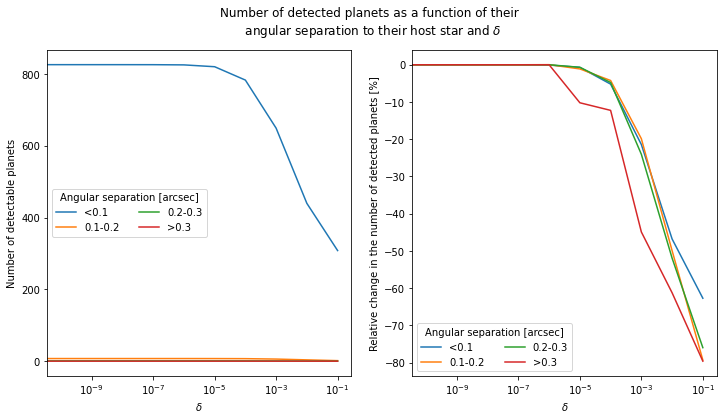

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.1,826.410,826.410,826.410,826.404,826.354,825.794,820.684,783.436,649.448,439.874,308.324
0.1-0.2,7.344,7.344,7.344,7.344,7.344,7.346,7.262,7.034,5.886,3.678,1.520
0.2-0.3,0.882,0.882,0.882,0.882,0.882,0.882,0.876,0.840,0.670,0.424,0.212
>0.3,0.098,0.098,0.098,0.098,0.098,0.098,0.088,0.086,0.054,0.038,0.020


In [37]:
analyzeS1("Number of detected planets as a function of their \n angular separation to their host star and $\delta$",
        'Angular separation [arcsec]', 'S1_Optimistic_AngSep.png',
        ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"], 'angular_sep',
        delta_, 'optimistic', 2)

## 'Pessimistic' configuration

### (P) Number of detectable planets for all types of stars

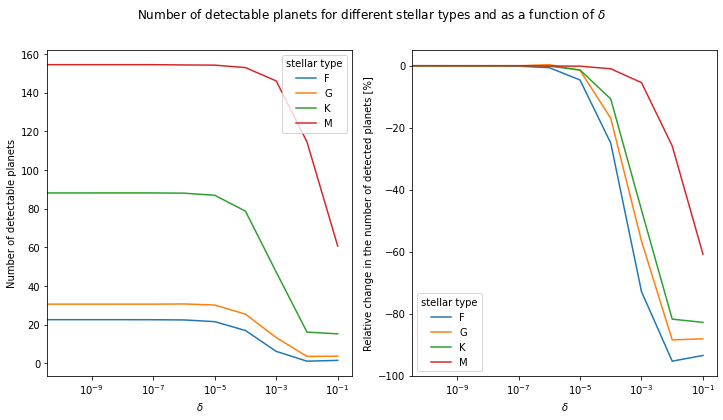

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,22.558,22.558,22.556,22.556,22.524,22.416,21.522,16.934,6.132,1.068,1.484
G,30.588,30.588,30.588,30.588,30.586,30.692,30.132,25.412,13.296,3.544,3.656
K,88.172,88.172,88.172,88.174,88.174,88.044,86.966,78.724,47.184,16.124,15.206
M,154.574,154.574,154.574,154.574,154.580,154.436,154.338,153.052,146.162,114.598,60.672


In [38]:
analyzeS1(r"Number of detectable planets for different stellar types and as a function of $\delta$",
        'stellar type', 'S1_Pessimistic_Stype.png',
        ["F", "G", "K", "M"], 'stype',
        delta_, 'pessimistic') 

### (P) Number of detectable planets in the HZ for different types of host stars

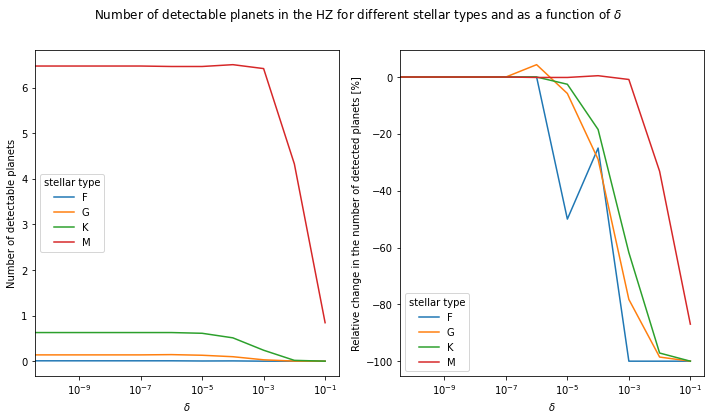

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
F,0.008,0.008,0.008,0.008,0.008,0.008,0.004,0.006,0.00,0.000,0.000
G,0.138,0.138,0.138,0.138,0.138,0.144,0.130,0.098,0.03,0.002,0.000
K,0.628,0.628,0.628,0.628,0.628,0.628,0.612,0.512,0.24,0.018,0.000
M,6.476,6.476,6.476,6.476,6.476,6.466,6.466,6.506,6.42,4.328,0.844


In [39]:
analyzeS1("Number of detectable planets in the HZ for different stellar types and as a function of $\delta$",
        'stellar type', 'S1_Pessimistic_StypeHZ.png',
        ["F", "G", "K", "M"], 'stypeHZ',
        delta_, 'pessimistic')

### (P) Number of detectable planets as a function of their distance to the instrument

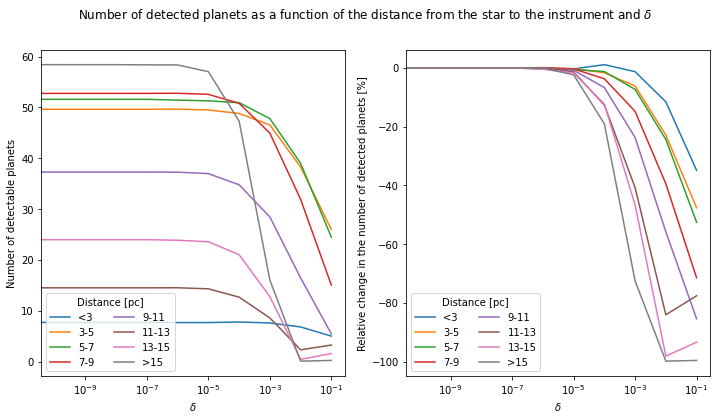

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<3,7.698,7.698,7.698,7.698,7.698,7.672,7.672,7.782,7.598,6.808,5.012
3-5,49.642,49.642,49.642,49.642,49.642,49.668,49.506,48.814,46.562,38.280,25.986
5-7,51.594,51.594,51.594,51.594,51.594,51.442,51.296,50.946,47.804,39.008,24.478
7-9,52.764,52.764,52.764,52.764,52.770,52.788,52.578,50.802,44.950,31.936,15.044
9-11,37.284,37.284,37.284,37.284,37.284,37.266,36.982,34.786,28.450,16.466,5.436
11-13,14.512,14.512,14.512,14.512,14.512,14.522,14.312,12.676,8.594,2.312,3.252
13-15,23.982,23.982,23.982,23.982,23.982,23.872,23.572,21.024,12.776,0.446,1.578
>15,58.416,58.416,58.414,58.416,58.382,58.358,57.040,47.292,16.040,0.078,0.232


In [40]:
# ??: does it make sense at the moment? all M-type stars > 10 pc removed to speed up calculations
analyzeS1("Number of detected planets as a function of the distance from the star to the instrument and $\delta$",
        'Distance [pc]', 'S1_Pessimistic_Distance.png',
        ["<3", "3-5", "5-7", "7-9", "9-11", "11-13", "13-15", ">15"], 'distance',
        delta_, 'pessimistic', 2)

### (P) Number of detectable planets as a function of their temperature

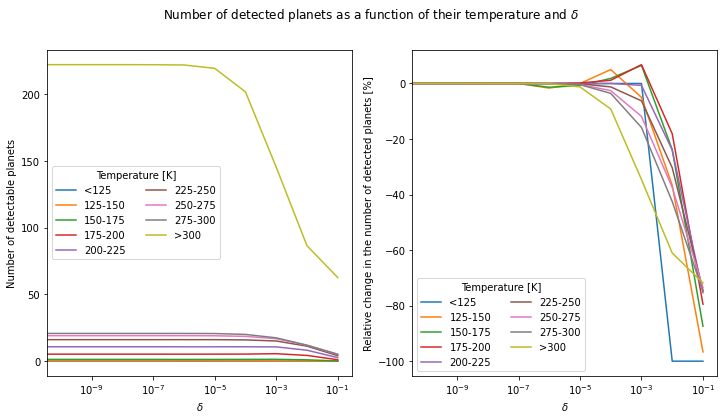

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<125,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.000,0.000
125-150,0.120,0.120,0.120,0.120,0.120,0.118,0.120,0.126,0.114,0.076,0.004
150-175,1.318,1.318,1.318,1.318,1.318,1.300,1.308,1.342,1.404,1.004,0.166
175-200,5.256,5.256,5.256,5.256,5.256,5.256,5.266,5.316,5.612,4.304,1.078
200-225,10.790,10.790,10.790,10.790,10.790,10.782,10.780,10.790,10.716,8.204,2.658
225-250,16.146,16.146,16.146,16.148,16.148,16.138,16.130,15.946,15.136,11.248,4.114
250-275,19.110,19.110,19.110,19.110,19.112,19.098,19.042,18.616,16.844,11.964,5.066
275-300,20.806,20.806,20.806,20.806,20.806,20.790,20.718,20.064,17.510,11.962,5.232
>300,222.344,222.344,222.342,222.342,222.312,222.104,219.592,201.920,145.436,86.572,62.700


In [41]:
analyzeS1("Number of detected planets as a function of their temperature and $\delta$",
        'Temperature [K]', 'S1_Pessimistic_Temperature.png',
        ["<125", "125-150", "150-175", "175-200", "200-225", "225-250", "250-275", "275-300", ">300"], 'temperature',
        delta_, 'pessimistic', 2)

### (P) Number of detectable planets as a function of their stellar insolation

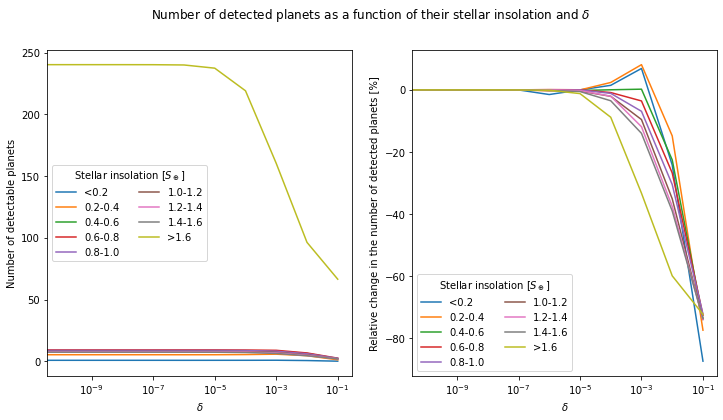

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.2,0.810,0.810,0.810,0.810,0.810,0.798,0.810,0.822,0.866,0.614,0.102
0.2-0.4,5.332,5.332,5.332,5.332,5.332,5.316,5.332,5.460,5.766,4.542,1.204
0.4-0.6,8.286,8.286,8.286,8.286,8.286,8.274,8.270,8.290,8.306,6.418,2.176
0.6-0.8,9.234,9.234,9.234,9.236,9.236,9.244,9.238,9.156,8.906,6.764,2.530
0.8-1.0,8.802,8.802,8.802,8.802,8.804,8.790,8.802,8.704,8.196,6.118,2.442
1.0-1.2,7.982,7.982,7.982,7.982,7.982,7.976,7.952,7.818,7.220,5.182,2.076
1.2-1.4,7.726,7.726,7.726,7.726,7.726,7.730,7.710,7.570,6.810,4.826,2.014
1.4-1.6,7.392,7.392,7.392,7.392,7.392,7.380,7.354,7.134,6.358,4.508,1.952
>1.6,240.328,240.328,240.326,240.326,240.296,240.080,237.490,219.168,160.346,96.362,66.522


In [42]:
analyzeS1("Number of detected planets as a function of their stellar insolation and $\delta$",
        'Stellar insolation [$S_\oplus$]', 'S1_Pessimistic_SInsolation.png',
        ["<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.4", "1.4-1.6", ">1.6"], 's_insolation',
        delta_, 'pessimistic', 2)

### (P) Number of detectable planets a function of their angular separation to their host star

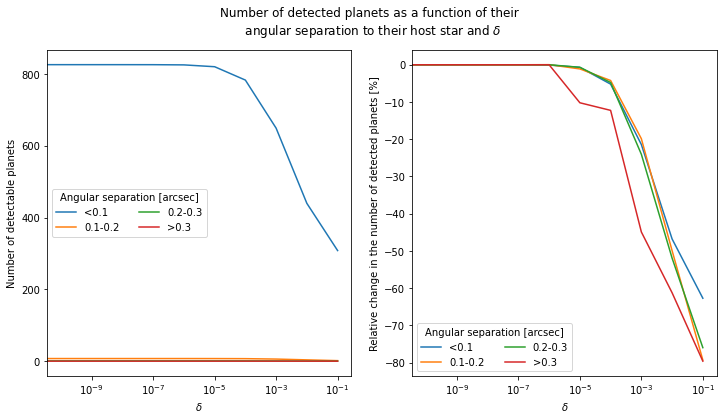

,0.0,1e-10,1e-09,1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1
<0.1,826.410,826.410,826.410,826.404,826.354,825.794,820.684,783.436,649.448,439.874,308.324
0.1-0.2,7.344,7.344,7.344,7.344,7.344,7.346,7.262,7.034,5.886,3.678,1.520
0.2-0.3,0.882,0.882,0.882,0.882,0.882,0.882,0.876,0.840,0.670,0.424,0.212
>0.3,0.098,0.098,0.098,0.098,0.098,0.098,0.088,0.086,0.054,0.038,0.020


In [43]:
analyzeS1("Number of detected planets as a function of their \n angular separation to their host star and $\delta$",
        'Angular separation [arcsec]', 'S1_Pessimistic_AngSep.png',
        ["<0.1", "0.1-0.2", "0.2-0.3", ">0.3"], 'angular_sep',
        delta_, 'optimistic', 2)